Presentation video: https://njit.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=291af7a6-6c40-4f63-abe0-b23d003f4d9a

In [322]:
# Import Needed Libraries
# Task 1:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 2:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

#Task 3
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

Data:

[attacking_data.csv](https://docs.google.com/spreadsheets/d/17pnYlM9_7YOxcYJf5Oz9upederKX9p193CHzGn1oZig/edit?gid=1846436359#gid=1846436359)

[attempts_data.csv](https://docs.google.com/spreadsheets/d/1-nXHZFLHD0tK25cGTIS8Mf9YtzM6EGA2p0JC892tvDI/edit?gid=1787343324#gid=178734334)

[players_data.csv](https://docs.google.com/spreadsheets/d/1oCB0eB8pd3d8i7Vm-7shmHuyCnyTE3UHyJeyeeKrrk4/edit?gid=2100541546#gid=2100541546)

[goals_data.csv](https://docs.google.com/spreadsheets/d/1vcAlF9THKncHUh6-RCuIPUmstynpVIfNmU8zBY6qWdY/edit?gid=67545738#gid=67545738)

[key_stats_data.csv](https://docs.google.com/spreadsheets/d/1ErBxK4q-o97ZMbpwpEYg8UzQTun-WVE2LycvrXPVfDw/edit?gid=980559794#gid=980559794)

[teams_data.csv](https://docs.google.com/spreadsheets/d/13gsgwNWlk6QfiJFaw26WtSbdvoyvbSJVb0QN03s9y10/edit?gid=288796300#gid=288796300)

In [323]:
players_data = pd.read_csv('players_data.csv')

players_data.head()

,id_player,player_name,nationality,field_position,position,weight(kg),height(cm),age,id_team,player_image
0,250016833,Harry Kane,England,Forward,STRIKER,65.0,188.0,31,50037,https://img.uefa.com/imgml/TP/players/1/2025/3...
1,250105927,Viktor Gyökeres,Sweden,Forward,NaN,NaN,NaN,26,50149,https://img.uefa.com/imgml/TP/players/1/2025/3...
2,250121533,Vinícius Júnior,Brazil,Forward,UNKNOWN,NaN,NaN,24,50051,https://img.uefa.com/imgml/TP/players/1/2025/3...
3,250121294,Tijjani Reijnders,Netherlands,Midfielder,CENTRAL_MIDFIELDER,NaN,NaN,26,50058,https://img.uefa.com/imgml/TP/players/1/2025/3...
4,250160436,Maghnes Akliouche,France,Midfielder,UNKNOWN,NaN,NaN,22,50023,https://img.uefa.com/imgml/TP/players/1/2025/3...


In [324]:
attacking_data = pd.read_csv('attacking_data.csv')

attacking_data.head()

,id_player,assists,corners_taken,offsides,dribbles
0,250052469,4.0,0.0,1.0,9.0
1,250130414,3.0,21.0,0.0,2.0
2,250070417,3.0,19.0,0.0,0.0
3,250112880,3.0,12.0,2.0,7.0
4,250177886,3.0,8.0,0.0,5.0


In [325]:
attempts_data = pd.read_csv('attempts_data.csv')

attempts_data.head()

,id_player,total_attempts,attempts_on_target,attempts_off_target,blocked
0,250016833,20.0,12.0,6.0,2.0
1,250103758,21.0,10.0,5.0,6.0
2,250121533,17.0,10.0,6.0,1.0
3,250076574,20.0,9.0,5.0,6.0
4,250105927,15.0,8.0,3.0,4.0


In [326]:
goals_data = pd.read_csv('goals_data.csv')

goals_data.head()

,id_player,goals,inside_area,outside_area,right_foot,left_foot,head,other,penalties_scored
0,250112880,5.0,3.0,2.0,1.0,4.0,0.0,0.0,0.0
1,250139445,3.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0
2,250121533,4.0,3.0,1.0,2.0,2.0,0.0,0.0,1.0
3,250159544,3.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0
4,250091187,3.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0


In [327]:
key_stats_data = pd.read_csv('key_stats_data.csv')

key_stats_data.head()

,id_player,distance_covered(km/h),top_speed,minutes_played,matches_appareance
0,250016833,43.71,30.35,360.0,4.0
1,250105927,41.94,34.55,360.0,4.0
2,250121533,38.39,35.47,360.0,4.0
3,250121294,46.61,32.26,360.0,4.0
4,250160436,44.67,33.39,360.0,4.0


In [328]:
teams_data = pd.read_csv('teams_data.csv')

teams_data.head()

,team_id,country,team,logo
0,50138,Italy,FC Internazionale Milano,https://img.uefa.com/imgml/TP/teams/logos/70x7...
1,50124,Spain,Atlético de Madrid,https://img.uefa.com/imgml/TP/teams/logos/70x7...
2,50111,Austria,SK Sturm Graz,https://img.uefa.com/imgml/TP/teams/logos/70x7...
3,52816,Italy,Atalanta BC,https://img.uefa.com/imgml/TP/teams/logos/70x7...
4,50050,Scotland,Celtic FC,https://img.uefa.com/imgml/TP/teams/logos/70x7...


Task 1: Exploratory Data Analysis
Data Preprocessing

In [329]:
# Handle Null Values
# 1. Check for null values
print("Null values in attacking_data:")
print(attacking_data.isnull().sum())

print("\nNull values in attempts_data:")
print(attempts_data.isnull().sum())

print("\nNull values in goals_data:")
print(goals_data.isnull().sum())

print("\nNull values in key_stats_data:")
print(key_stats_data.isnull().sum())

Null values in attacking_data:
id_player          0
assists          181
corners_taken    181
offsides         181
dribbles         181
dtype: int64

Null values in attempts_data:
id_player                0
total_attempts         181
attempts_on_target     181
attempts_off_target    181
blocked                181
dtype: int64

Null values in goals_data:
id_player             0
goals               181
inside_area         181
outside_area        181
right_foot          181
left_foot           181
head                181
other               181
penalties_scored    181
dtype: int64

Null values in key_stats_data:
id_player                   0
distance_covered(km/h)    181
top_speed                 181
minutes_played            181
matches_appareance        181
dtype: int64


In [330]:
# 2. Handel Null Data
attacking_data['assists'] = attacking_data['assists'].fillna(attacking_data['assists'].mean())
attacking_data['corners_taken'] = attacking_data['corners_taken'].fillna(attacking_data['corners_taken'].mean())
attacking_data['offsides'] = attacking_data['offsides'].fillna(attacking_data['offsides'].median())
attacking_data['dribbles'] = attacking_data['dribbles'].fillna(attacking_data['dribbles'].median())

print("\nNull values in attacking_data after handling:")
print(attacking_data.isnull().sum())

attempts_data['total_attempts'] = attempts_data['total_attempts'].fillna(attempts_data['total_attempts'].mean())
attempts_data['attempts_on_target'] = attempts_data['attempts_on_target'].fillna(attempts_data['attempts_on_target'].mean())
attempts_data['attempts_off_target'] = attempts_data['attempts_off_target'].fillna(attempts_data['attempts_off_target'].median())
attempts_data['blocked'] = attempts_data['blocked'].fillna(attempts_data['blocked'].median())

print("\nNull values in attempts_data after handling:")
print(attempts_data.isnull().sum())

goals_data['goals'] = goals_data['goals'].fillna(goals_data['goals'].median())
goals_data['inside_area'] = goals_data['inside_area'].fillna(goals_data['inside_area'].mean())
goals_data['outside_area'] = goals_data['outside_area'].fillna(goals_data['outside_area'].median())
goals_data['right_foot'] = goals_data['right_foot'].fillna(goals_data['right_foot'].median())
goals_data['left_foot'] = goals_data['left_foot'].fillna(goals_data['left_foot'].median())
goals_data['head'] = goals_data['head'].fillna(goals_data['head'].median())
goals_data['other'] = goals_data['other'].fillna(goals_data['other'].median())
goals_data['penalties_scored'] = goals_data['penalties_scored'].fillna(goals_data['penalties_scored'].median())

print("\nNull values in goals_data after handling:")
print(goals_data.isnull().sum())

key_stats_data['distance_covered(km/h)'] = key_stats_data['distance_covered(km/h)'].fillna(key_stats_data['distance_covered(km/h)'].mean())
key_stats_data['top_speed'] = key_stats_data['top_speed'].fillna(key_stats_data['top_speed'].mean())
key_stats_data['minutes_played'] = key_stats_data['minutes_played'].fillna(key_stats_data['minutes_played'].median())
key_stats_data['matches_appareance'] = key_stats_data['matches_appareance'].fillna(key_stats_data['matches_appareance'].median())

print("\nNull values in key_stats_data after handling:")
print(key_stats_data.isnull().sum())


Null values in attacking_data after handling:
id_player        0
assists          0
corners_taken    0
offsides         0
dribbles         0
dtype: int64

Null values in attempts_data after handling:
id_player              0
total_attempts         0
attempts_on_target     0
attempts_off_target    0
blocked                0
dtype: int64

Null values in goals_data after handling:
id_player           0
goals               0
inside_area         0
outside_area        0
right_foot          0
left_foot           0
head                0
other               0
penalties_scored    0
dtype: int64

Null values in key_stats_data after handling:
id_player                 0
distance_covered(km/h)    0
top_speed                 0
minutes_played            0
matches_appareance        0
dtype: int64


Visualizations and Insights

Player Data:

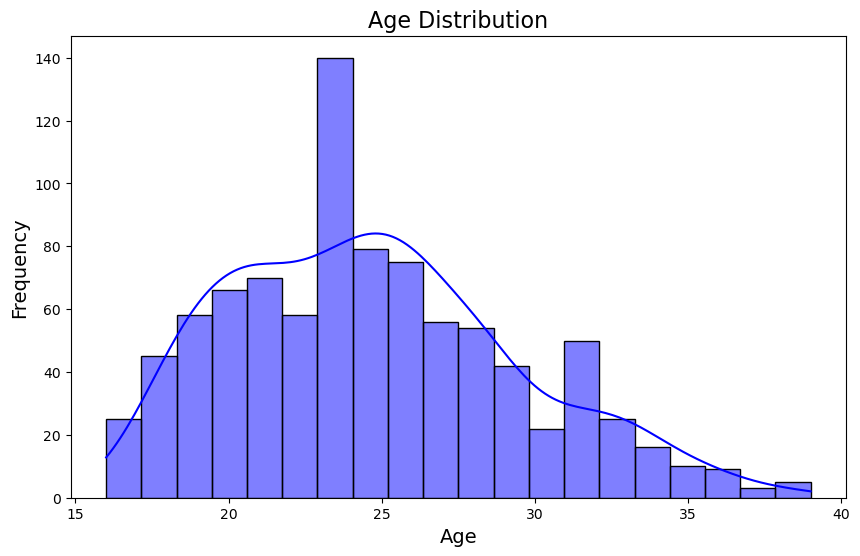

In [331]:
# 1. Age Distribution: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(players_data['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


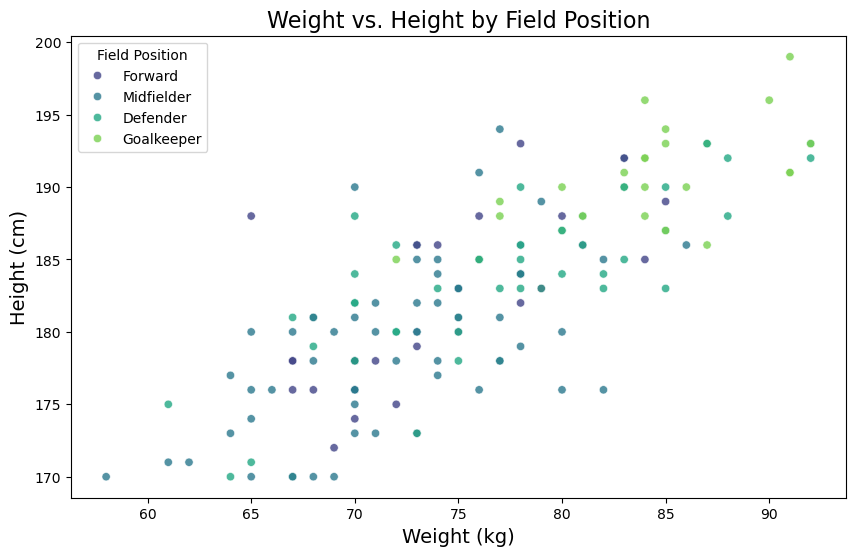

In [332]:
# 2. Weight vs. Height
plt.figure(figsize=(10, 6))
sns.scatterplot(data=players_data, x='weight(kg)', y='height(cm)', hue='field_position', palette='viridis', alpha=0.8)
plt.title('Weight vs. Height by Field Position', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=14)
plt.ylabel('Height (cm)', fontsize=14)
plt.legend(title='Field Position')
plt.show()

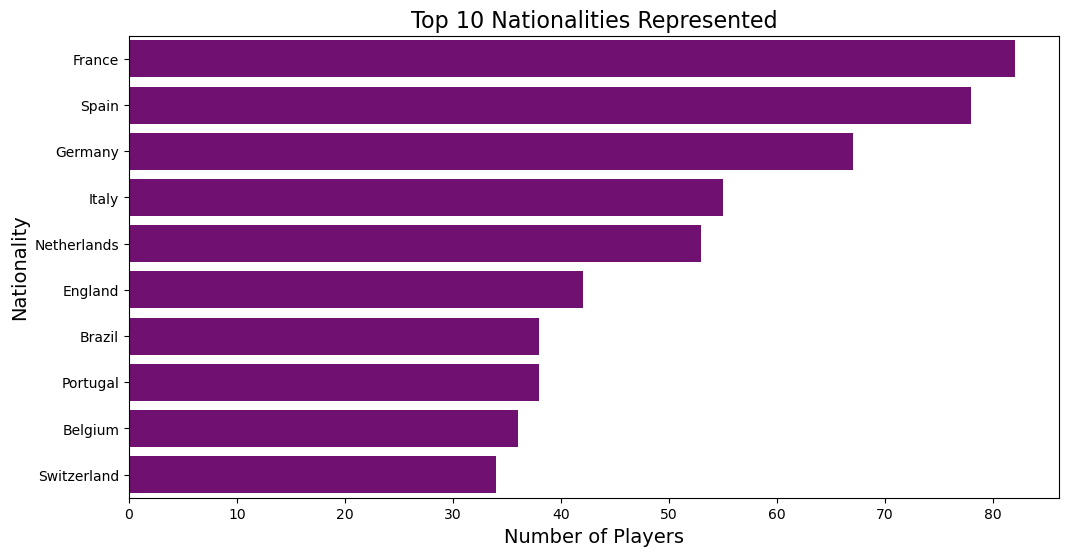

In [333]:
# 3. Nationality Distribution
top_nationalities = players_data['nationality'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index, color='purple')  # Removed palette
plt.title('Top 10 Nationalities Represented', fontsize=16)
plt.xlabel('Number of Players', fontsize=14)
plt.ylabel('Nationality', fontsize=14)
plt.show()


Attacking Data

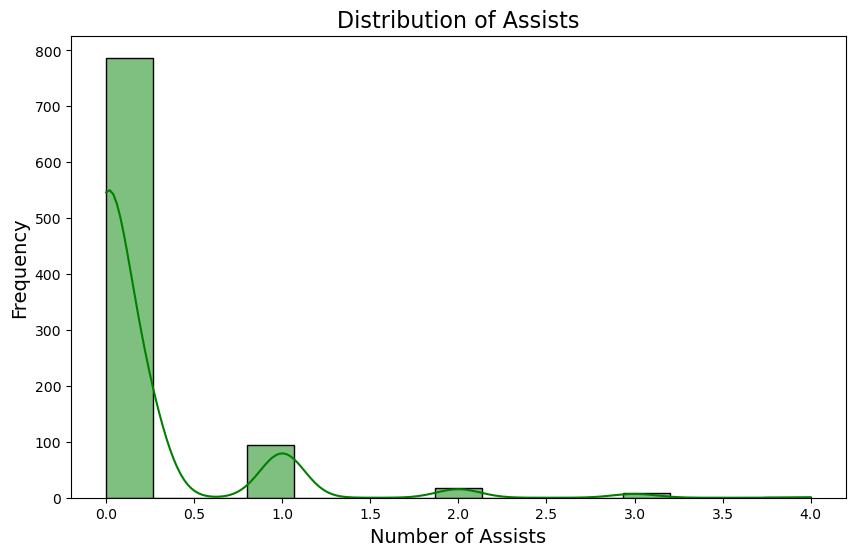

In [334]:
# 1. Distribution of Assists
plt.figure(figsize=(10, 6))
sns.histplot(attacking_data['assists'], kde=True, bins=15, color='green')
plt.title('Distribution of Assists', fontsize=16)
plt.xlabel('Number of Assists', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

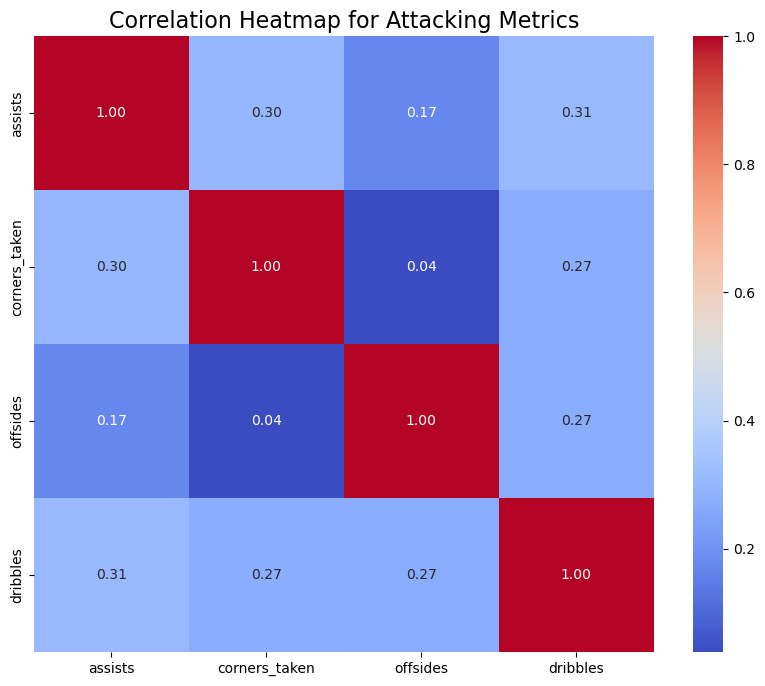

In [335]:
# 2. Relationship Heatmap
relevant_columns = ['assists', 'corners_taken', 'offsides', 'dribbles']
correlation_matrix = attacking_data[relevant_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Attacking Metrics', fontsize=16)
plt.show()


Attempts Data

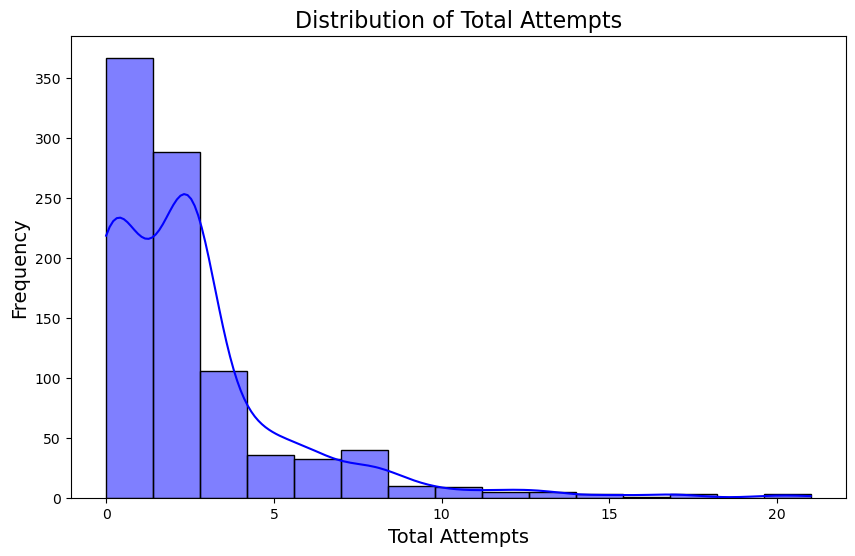

In [336]:
# 1. Distribution of Total Attempts
plt.figure(figsize=(10, 6))
sns.histplot(attempts_data['total_attempts'], kde=True, bins=15, color='blue')
plt.title('Distribution of Total Attempts', fontsize=16)
plt.xlabel('Total Attempts', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

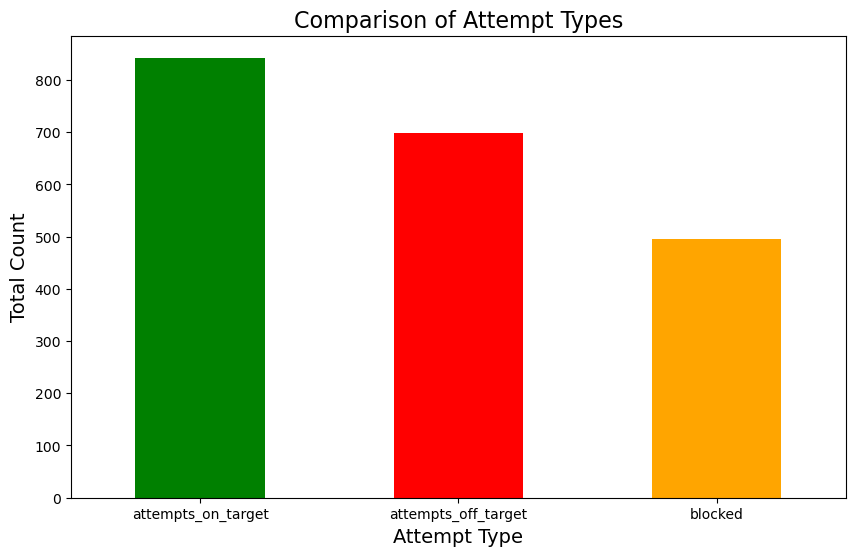

In [337]:
# 2. Comparison of Attempt Types
attempt_types = ['attempts_on_target', 'attempts_off_target', 'blocked']
attempt_totals = attempts_data[attempt_types].sum()

plt.figure(figsize=(10, 6))
attempt_totals.plot(kind='bar', color=['green', 'red', 'orange'])
plt.title('Comparison of Attempt Types', fontsize=16)
plt.xlabel('Attempt Type', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(rotation=0)
plt.show()

Goal Data

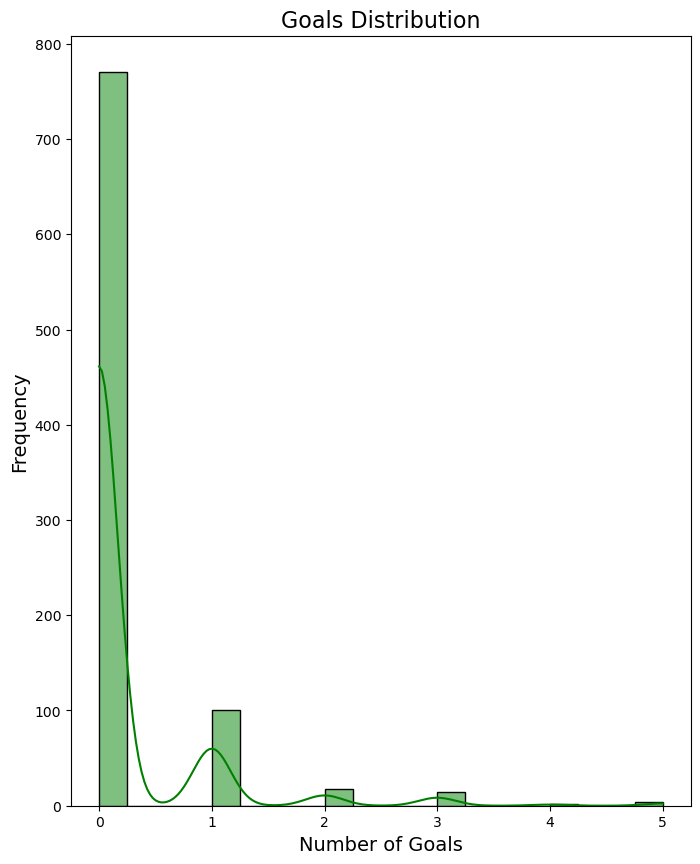

In [338]:
# 1. Goal Distribution
plt.figure(figsize=(8, 10))
sns.histplot(goals_data['goals'], kde=True, bins=20, color='green')
plt.title('Goals Distribution', fontsize=16)
plt.xlabel('Number of Goals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

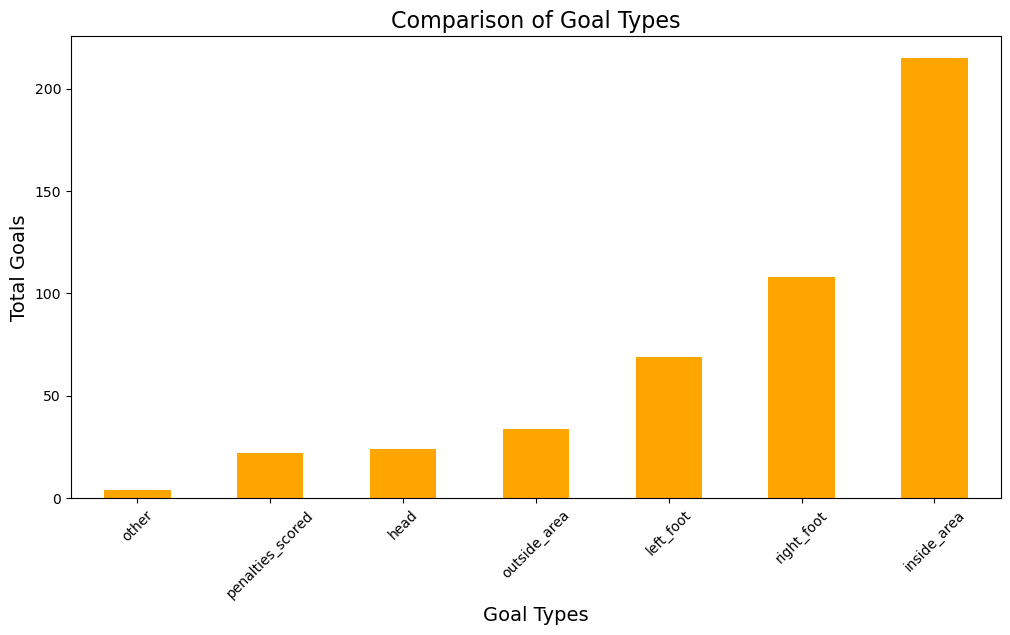

In [339]:
# 2. Comparison of Goal Types

goal_types = ['inside_area', 'outside_area', 'right_foot', 'left_foot', 'head', 'other', 'penalties_scored']

# Summing up each goal type
goal_type_totals = goals_data[goal_types].sum().sort_values()

plt.figure(figsize=(12, 6))
goal_type_totals.plot(kind='bar', color='orange')
plt.title('Comparison of Goal Types', fontsize=16)
plt.xlabel('Goal Types', fontsize=14)
plt.ylabel('Total Goals', fontsize=14)
plt.xticks(rotation=45)
plt.show()


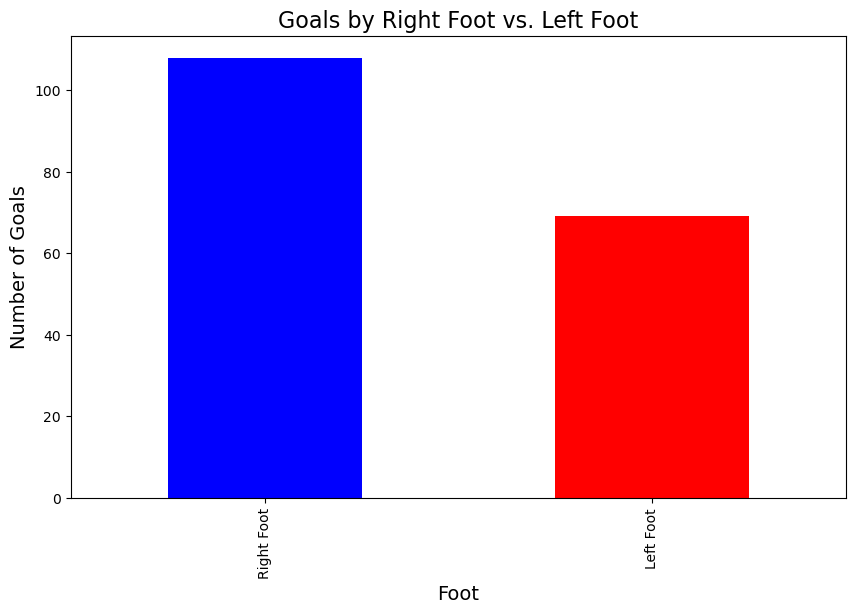

In [340]:
# 3. Goals by Foot
foot_goals = ['right_foot', 'left_foot']

# Creating a grouped bar chart
goals_by_foot = goals_data[foot_goals].sum()

plt.figure(figsize=(10, 6))
goals_by_foot.plot(kind='bar', color=['blue', 'red'])
plt.title('Goals by Right Foot vs. Left Foot', fontsize=16)
plt.xlabel('Foot', fontsize=14)
plt.ylabel('Number of Goals', fontsize=14)
plt.xticks([0, 1], ['Right Foot', 'Left Foot'])
plt.show()


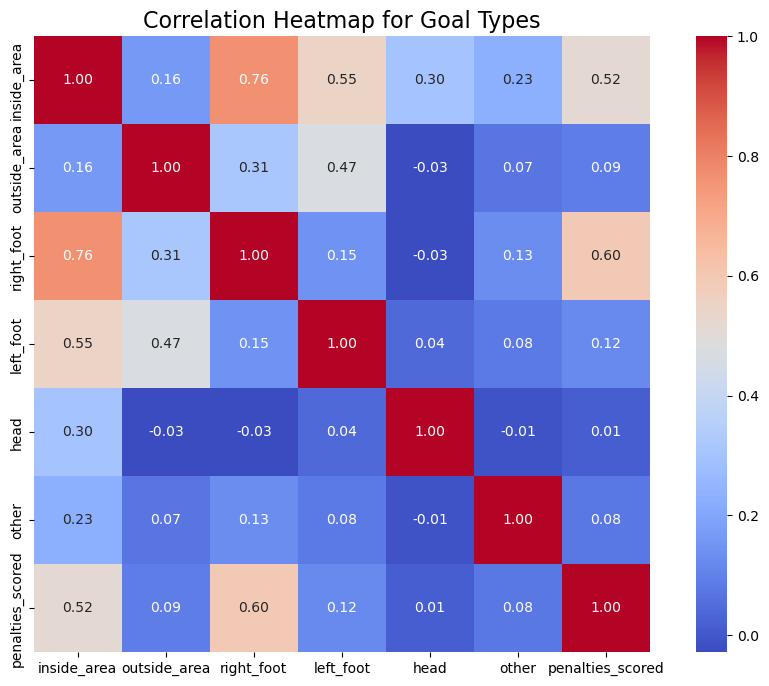

In [341]:
# 4. Correlation Heatmap
correlation_matrix = goals_data[goal_types].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap for Goal Types', fontsize=16)
plt.show()


Key stats Data

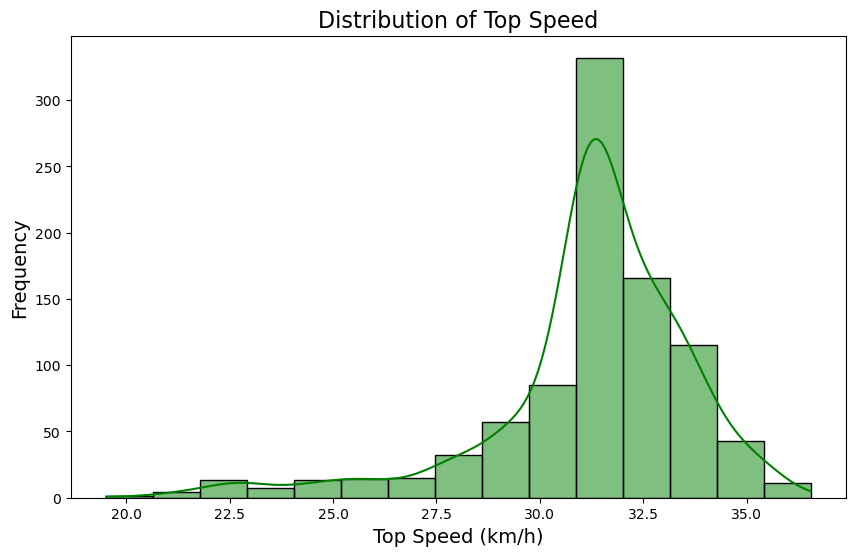

In [342]:
# 1. Top Speed Distribution
plt.figure(figsize=(10, 6))
sns.histplot(key_stats_data['top_speed'], kde=True, bins=15, color='green')
plt.title('Distribution of Top Speed', fontsize=16)
plt.xlabel('Top Speed (km/h)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()



Team Data

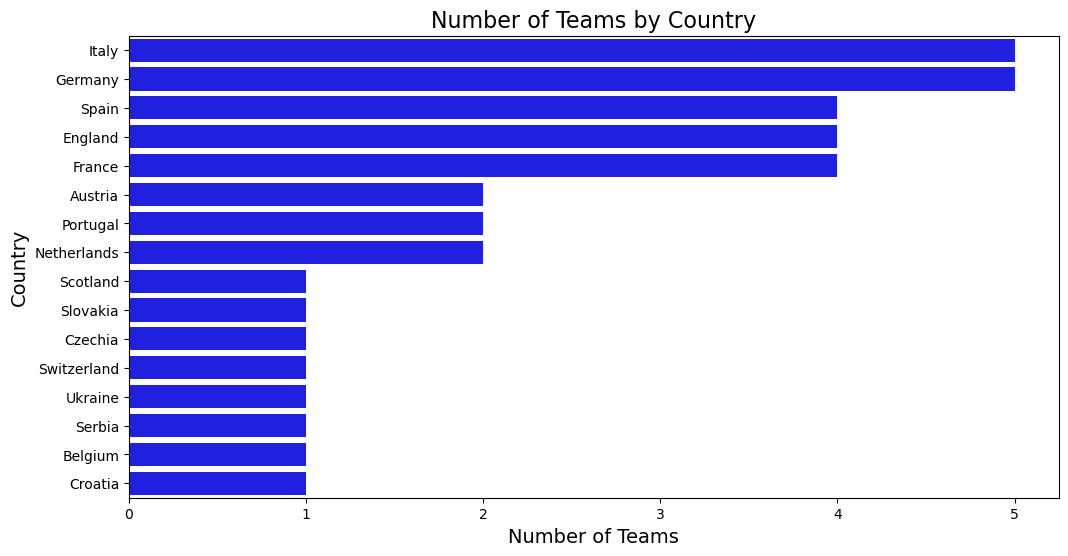

In [343]:
# 1. Team Count by Country
country_counts = teams_data['country'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, color='blue')  # Use a single color
plt.title('Number of Teams by Country', fontsize=16)
plt.xlabel('Number of Teams', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()


Task 2: Train Models

In [344]:
# Selecting features and target variable
X = goals_data[['inside_area', 'outside_area', 'right_foot']]
y = goals_data['goals']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numerical_features = ['inside_area', 'outside_area']
categorical_features = ['right_foot']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Preprocessed training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [345]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_transformed, y_train)
y_pred_linear = linear_model.predict(X_test_transformed)

# Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_transformed, y_train)
y_pred_tree = tree_model.predict(X_test_transformed)

# Model Evaluation
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R2 Score:", r2_score(y_test, y_pred_linear))

print("\nDecision Tree Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R2 Score:", r2_score(y_test, y_pred_tree))

Linear Regression:
MSE: 0.007858352851641713
R2 Score: 0.980610794796441

Decision Tree Regressor:
MSE: 0.0
R2 Score: 1.0


In [346]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_transformed, y_train)
y_pred_gb = gb_model.predict(X_test_transformed)

print("\nGradient Boosting Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R2 Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting Regressor:
MSE: 1.3665282899184312e-08
R2 Score: 0.9999999662831411


In [347]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9945054945054945

Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       153
         1.0       1.00      1.00      1.00        23
         2.0       0.67      1.00      0.80         2
         3.0       1.00      0.67      0.80         3
         5.0       1.00      1.00      1.00         1

    accuracy                           0.99       182
   macro avg       0.93      0.93      0.92       182
weighted avg       1.00      0.99      0.99       182



In [348]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_transformed, y_train)
y_pred_rf = rf_model.predict(X_test_transformed)

print("\nRandom Forest Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor:
MSE: 0.00039615384615384675
R2 Score: 0.9990225549348231


Task 3: Test and Evaluate

In [349]:
# 1. Regression Model
# Linear Regression Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Decision Tree Regressor Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Gradient Boosting Regressor Evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Random Forest Regressor Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print Results
print("Linear Regression: MSE =", mse_linear, ", R2 =", r2_linear)
print("Decision Tree Regressor: MSE =", mse_tree, ", R2 =", r2_tree)
print("Gradient Boosting Regressor: MSE =", mse_gb, ", R2 =", r2_gb)
print("Random Forest Regressor: MSE =", mse_rf, ", R2 =", r2_rf)

Linear Regression: MSE = 0.007858352851641713 , R2 = 0.980610794796441
Decision Tree Regressor: MSE = 0.0 , R2 = 1.0
Gradient Boosting Regressor: MSE = 1.3665282899184312e-08 , R2 = 0.9999999662831411
Random Forest Regressor: MSE = 0.00039615384615384675 , R2 = 0.9990225549348231


Task 4
Key Comparisons and Observations
Handling Outliers
•	Gradient Boosting and Random Forest were more robust to outliers due to their ensemble-based approaches, averaging or iterative corrections.
•	Linear Regression struggled with outliers, which skewed its predictions and lowered its performance.
•	Decision Trees overfit the data, fitting to outliers rather than generalizing well.
Complexity of Relationships
•	Gradient Boosting and Random Forest excelled in modeling non-linear relationships due to their tree-based structures.
•	Linear Regression could not capture these complexities, leading to suboptimal performance.
Overfitting
•	Decision Trees showed perfect performance on training data but are likely overfitting due to their tendency to create overly specific splits.
•	Gradient Boosting and Random Forest mitigated overfitting through ensemble techniques.
________________________________________
Recommendations
1.	Best Model for Regression:
o	Gradient Boosting Regressor: For the best accuracy and robustness to outliers.
o	Random Forest Regressor: A strong alternative with slightly less computational complexity.
2.	Best Model for Classification:
o	Random Forest Classifier: High accuracy and balanced metrics across classes.
3.	Improvements for Linear Regression:
o	Perform outlier removal or robust scaling.
o	Use polynomial regression to capture non-linear relationships.
4.	Mitigating Overfitting in Decision Trees:
o	Apply regularization techniques, such as limiting tree depth or minimum samples per leaf.
________________________________________
Conclusion
Gradient Boosting and Random Forest models excelled due to their ability to handle non-linearity, outliers, and complex patterns. Linear Regression and Decision Trees were limited by their inability to generalize effectively, with Linear Regression struggling with non-linear relationships and Decision Trees overfitting the data.